# Evaluating temperature from a dataset sample (Global Land Temperature)
### dataset structure:
• Date, when the measurement was taken
• AverageTemperature
• AverageTemperatureUncertainty
• City, from which the measurement was taken 
• Country
• Latitude
• Longitude

Is required to fill any gaps with the arithmetic mean among the closest antecedent and the closest successive measurements in time, taken in the same city


In [2]:
import csv

col_names = []
dataset = [[], [], [], [], [], [], []]
with open('GLT_filtered.csv') as fp:
    reader = csv.reader(fp)
    col_names = next(reader)
    for cols in reader:
        if len(cols) == len(col_names): # every column must be present
            for i in range(len(dataset)):
                dataset[i].append(cols[i])

In [3]:
def count_missing(data):
    return sum([1 for d in data if d == ''])

count = len(dataset[1])
print(f'AverageTemperature, missing values out of the whole dataset: {100*count_missing(dataset[1])/count:.1f}%')
print(f'AverageTemperatureUncertainty, missing values out of the whole dataset: {100*count_missing(dataset[2])/count:.1f}%')

AverageTemperature, missing values out of the whole dataset: 12.6%
AverageTemperatureUncertainty, missing values out of the whole dataset: 12.6%


In [4]:
def fill_gaps(data):
    right_i = 0
    right_v = 0
    
    for i, value in enumerate(data):
        left_v = data[i-1] if i != 0 else 0
        
        # reuse the right_v value, useful when there are multiple consecutive missing values
        if i < right_i:
            data[i] = (left_v + right_v) / 2
            continue

        if value == '':
            try:
                # use a generator to search for the first occurrence 
                right_i, right_v = next((idx+i+1, float(v)) for idx, v in enumerate(data[i+1:]) if v != '')
            except StopIteration: # fired when the generator has no items left to iterate on
                right_i = len(data)
                right_v = 0
            data[i] = (left_v + right_v) / 2
        else:
            data[i] = float(data[i]) # parse to float all present values

In [5]:
cities = set(dataset[3])
print('Number of distinct cities:', len(cities))

Number of distinct cities: 100


In [6]:
city_avg_temp = {}
city_avg_temp_unc = {}

for city in cities:
    idxs = [i for i, c in enumerate(dataset[3]) if c == city] # extract the indices
    city_avg_temp[city] = [dataset[1][i] for i in idxs]
    city_avg_temp_unc[city] = [dataset[2][i] for i in idxs]  

In [7]:
for city in cities:
    fill_gaps(city_avg_temp[city])
    fill_gaps(city_avg_temp_unc[city])

In [8]:
def print_hottest_coolest(city, N, city_avg_temp):
    srtd = sorted(city_avg_temp[city], reverse=True)
    print(f'The top {N} hottest measurements taken in {city} are:', srtd[:N])
    print(f'The top {N} coolest measurements taken in {city} are:', srtd[-1:-(N+1):-1])

In [9]:
print_hottest_coolest('Rome', 5, city_avg_temp)

The top 5 hottest measurements taken in Rome are: [25.951, 24.998, 24.873, 24.730999999999998, 24.48]
The top 5 coolest measurements taken in Rome are: [-1.4410000000000005, -1.3039999999999994, -1.0189999999999997, -0.871, -0.7829999999999999]


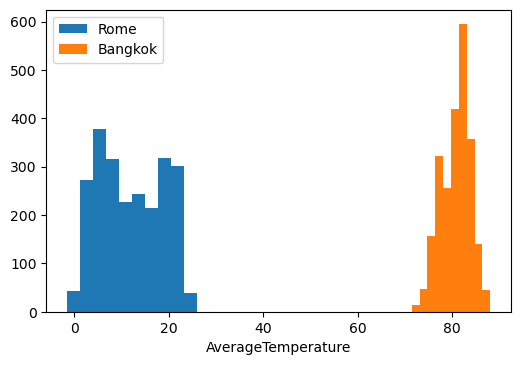

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

for city in ['Rome', 'Bangkok']:
    plt.hist(city_avg_temp[city], label=city)
plt.legend()
_ = plt.xlabel('AverageTemperature')

In [12]:
def fah2cel(deg_fah):
    return (deg_fah - 32) / 1.8

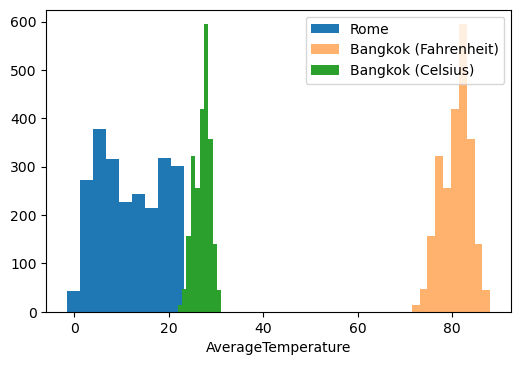

In [13]:
bang_celsius = [fah2cel(t) for t in city_avg_temp['Bangkok']]
plt.rcParams['figure.dpi'] = 100
plt.hist(city_avg_temp['Rome'], label='Rome')
plt.hist(city_avg_temp['Bangkok'], label='Bangkok (Fahrenheit)', alpha=0.6)
plt.hist(bang_celsius, label='Bangkok (Celsius)')
plt.legend()
_ = plt.xlabel('AverageTemperature')